Optimal lambda: 1.5751504424712912


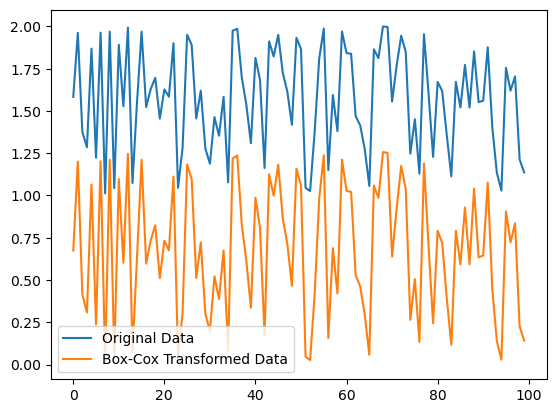

<lifelines.CoxPHFitter: fitted with 100 total observations, 51 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 49
   partial log-likelihood = -178.60
         time fit was run = 2025-01-26 02:10:25 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.00      1.00      0.01           -0.01            0.02                0.99                1.02

           cmp to    z    p  -log2(p)
covariate                            
age          0.00 0.66 0.51      0.98
---
Concordance = 0.52
Partial AIC = 359.19
log-likelihood ratio test = 0.44 on 1 df
-log2(p) of ll-ratio test = 0.98

Leland-Toft Equity Value: 24.59


In [10]:
import numpy as np
from scipy.stats import boxcox
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Box-Cox Transformation
def box_cox_transformation(data, lambda_value=None):
    """
    Apply Box-Cox transformation to data.
    Reference: Proietti and Lütkepohl (2013), Zheng and Song (2014)
    """
    transformed_data, optimal_lambda = boxcox(data) if lambda_value is None else boxcox(data, lmbda=lambda_value)
    return transformed_data, optimal_lambda


# Example for Box-Cox
data = np.random.rand(100) + 1  # Generate random data > 0
transformed_data, optimal_lambda = box_cox_transformation(data)
print(f"Optimal lambda: {optimal_lambda}")
plt.plot(data, label="Original Data")
plt.plot(transformed_data, label="Box-Cox Transformed Data")
plt.legend()
plt.show()

# Cox Proportional Hazards Model
def cox_ph_model(data, duration_col, event_col):
    """
    Apply Cox Proportional Hazards model to survival data.
    Reference: Zhu and Fan (2011), Liu (2012)
    """
    cph = CoxPHFitter()
    cph.fit(data, duration_col=duration_col, event_col=event_col)
    cph.print_summary()
    return cph


# Example for Cox Proportional Hazards Model
# Simulated survival data
import pandas as pd
np.random.seed(42)
df = pd.DataFrame({
    "duration": np.random.exponential(10, 100),
    "event": np.random.randint(0, 2, 100),
    "age": np.random.randint(20, 80, 100)
})
cox_model = cox_ph_model(df, "duration", "event")

# Leland-Toft Structural Model
def leland_toft_equity_value(V, sigma, r, D, T):
    """
    Leland-Toft model for equity valuation.
    Reference: Charalambous et al. (2020), Palmowski et al. (2020)
    """
    from scipy.stats import norm
    d1 = (np.log(V / D) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    equity_value = V * norm.cdf(d1) - D * np.exp(-r * T) * norm.cdf(d2)
    return equity_value


# Example for Leland-Toft
V = 100  # Asset value
sigma = 0.2  # Volatility
r = 0.05  # Risk-free rate
D = 80  # Debt value
T = 1  # Time to maturity
equity = leland_toft_equity_value(V, sigma, r, D, T)
print(f"Leland-Toft Equity Value: {equity:.2f}")


In [11]:
!pip install lifelines

[*********************100%***********************]  1 of 1 completed


Optimal lambda: 0.6813557351554387


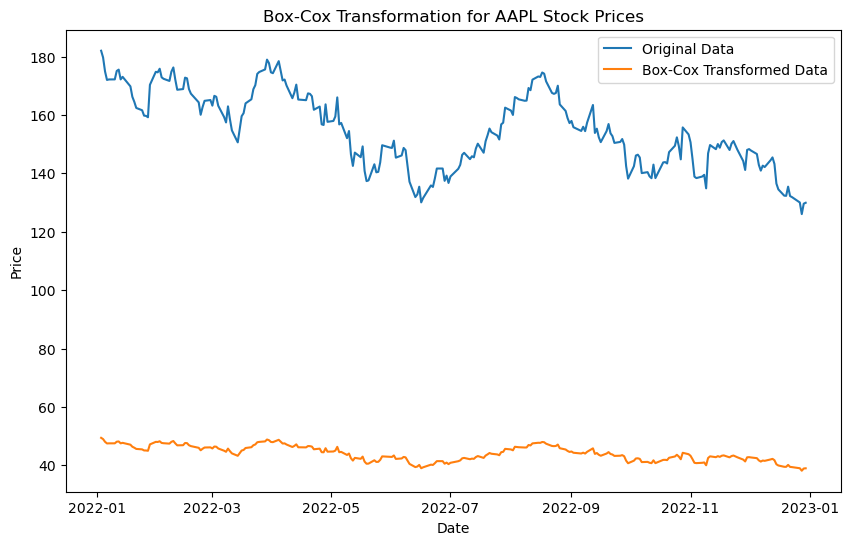

In [13]:
import numpy as np
from scipy.stats import boxcox
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Box-Cox Transformation
def box_cox_transformation(data, lambda_value=None):
    """
    Apply Box-Cox transformation to data.
    Reference: Proietti and Lütkepohl (2013), Zheng and Song (2014)
    """
    transformed_data, optimal_lambda = boxcox(data) if lambda_value is None else boxcox(data, lmbda=lambda_value)
    return transformed_data, optimal_lambda


# Fetch real financial data using yfinance
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']  # Use the 'Close' prices for analysis


# Use real stock data for Box-Cox transformation
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)

# Apply Box-Cox transformation
# Ensure data is clean and positive before applying Box-Cox
cleaned_data = real_data.dropna().values  # Remove NaN values
cleaned_data = cleaned_data[cleaned_data > 0]  # Keep only positive values

# Apply Box-Cox transformation
if len(cleaned_data) > 0:  # Ensure there's valid data
    transformed_data, optimal_lambda = box_cox_transformation(cleaned_data)
    print(f"Optimal lambda: {optimal_lambda}")

    # Plot the original and transformed data
    plt.figure(figsize=(10, 6))
    plt.plot(real_data.index[:len(cleaned_data)], cleaned_data, label="Original Data")
    plt.plot(real_data.index[:len(cleaned_data)], transformed_data, label="Box-Cox Transformed Data")
    plt.legend()
    plt.title(f"Box-Cox Transformation for {ticker} Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
else:
    print("No valid data to apply the Box-Cox transformation.")


[*********************100%***********************]  1 of 1 completed


<lifelines.CoxPHFitter: fitted with 251 total observations, 114 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 251
number of events observed = 137
   partial log-likelihood = -620.53
         time fit was run = 2025-01-26 02:10:28 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
price      0.01      1.01      0.01           -0.01            0.02                0.99                1.02

           cmp to    z    p  -log2(p)
covariate                            
price        0.00 0.83 0.41      1.29
---
Concordance = 0.52
Partial AIC = 1243.05
log-likelihood ratio test = 0.68 on 1 df
-log2(p) of ll-ratio test = 1.29

Optimal lambda: 0.6813557351554387


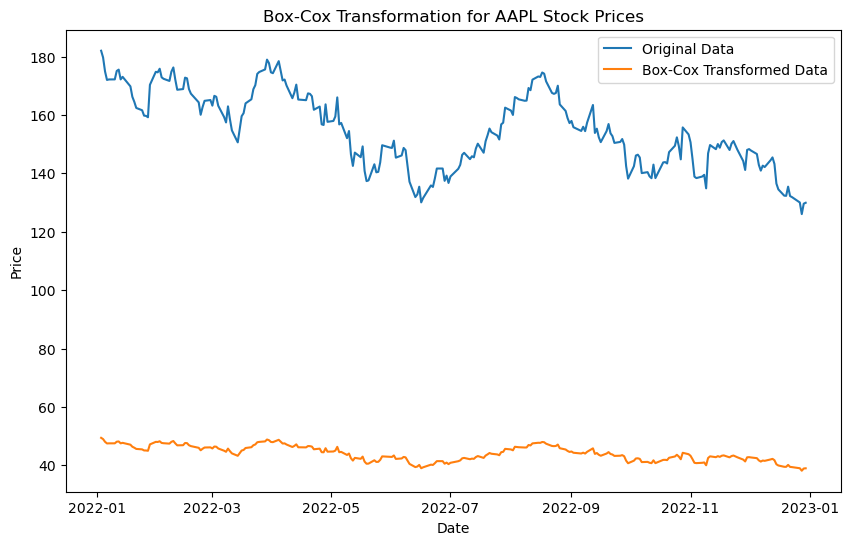

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import yfinance as yf


# Fetch real financial data using yfinance
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']  # Use the 'Close' prices for analysis


# Box-Cox Transformation
def box_cox_transformation(data, lambda_value=None):
    """
    Apply Box-Cox transformation to data.
    """
    transformed_data, optimal_lambda = boxcox(data) if lambda_value is None else boxcox(data, lmbda=lambda_value)
    return transformed_data, optimal_lambda


# Cox Proportional Hazards Model
def cox_ph_model(data, duration_col, event_col):
    """
    Apply Cox Proportional Hazards model to survival data.
    """
    cph = CoxPHFitter()
    cph.fit(data, duration_col=duration_col, event_col=event_col)
    cph.print_summary()
    return cph


# Main Script
# Step 1: Fetch real financial data
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2022-12-31"
real_data = fetch_financial_data(ticker, start_date, end_date)

# Step 2: Clean and prepare the data
real_data = real_data.dropna()  # Remove any NaN values
real_data = real_data[real_data > 0]  # Ensure positive values only

# Step 3: Simulated survival data for Cox model
np.random.seed(42)
cleaned_data = real_data.values  # Extract values for transformation
cleaned_data = real_data.dropna().values  # Remove NaN values
cleaned_data = cleaned_data[cleaned_data > 0]  # Keep only positive values



df = pd.DataFrame({
    "duration": np.random.exponential(10, len(cleaned_data)),  # Simulated survival times
    "event": np.random.randint(0, 2, len(cleaned_data)),  # Random binary events (0 or 1)
    "price": cleaned_data  # Financial data (stock prices)
})

# Step 4: Fit the Cox Proportional Hazards Model
cox_model = cox_ph_model(df, "duration", "event")

# Step 5: Apply Box-Cox transformation
if len(cleaned_data) > 0:  # Ensure valid data for Box-Cox
    transformed_data, optimal_lambda = box_cox_transformation(cleaned_data)
    print(f"Optimal lambda: {optimal_lambda}")

    # Plot original and transformed data
    plt.figure(figsize=(10, 6))
    plt.plot(real_data.index, cleaned_data, label="Original Data")
    plt.plot(real_data.index, transformed_data, label="Box-Cox Transformed Data")
    plt.legend()
    plt.title(f"Box-Cox Transformation for {ticker} Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
else:
    print("No valid data to apply the Box-Cox transformation.")


In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf
from lifelines import CoxPHFitter

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define VAE

def build_vae(input_dim, latent_dim):
    # Encoder
    inputs = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    encoder = tf.keras.Model(inputs, [z_mean, z_log_var], name="encoder")

    # Decoder
    latent_inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")

    # VAE model
    z_mean, z_log_var = encoder(inputs)
    vae_outputs = decoder(z_mean)  # Output is the reconstructed data
    vae = tf.keras.Model(inputs, vae_outputs, name="vae")

    return vae, encoder, z_mean, z_log_var

def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(inputs, outputs))
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    total_loss = reconstruction_loss + kl_loss
    return total_loss

# Example to build and compile the VAE model
input_dim = 10  # Adjust based on your data
latent_dim = 2  # Latent space dimension
vae, encoder, z_mean, z_log_var = build_vae(input_dim, latent_dim)

# Compile the model
vae.compile(optimizer=Adam(), loss=lambda inputs, outputs: vae_loss(inputs, outputs, z_mean, z_log_var))

# Test the compiled model
vae.summary()


# Fetch data and ensure proper formatting
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.DataFrame):
        real_data = real_data['Close']  # Assuming the 'Close' column
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Ensure DateTimeIndex
real_data.index = pd.to_datetime(real_data.index)

# Calculate features
features = calculate_features(real_data)
print(features.head())

# Check for invalid or NaN values in features
if features.isnull().any().any():
    raise ValueError("Features contain NaN values. Please clean the data.")

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Train VAE
input_dim = scaled_features.shape[1]
latent_dim = 2  # Number of latent variables

# Unpack all returned values from build_vae
vae, encoder, z_mean, z_log_var = build_vae(input_dim, latent_dim)

# Compile the model
vae.compile(optimizer=Adam(), loss=lambda inputs, outputs: vae_loss(inputs, outputs, z_mean, z_log_var))

# Train the model
vae.fit(scaled_features, scaled_features, epochs=50, batch_size=16, verbose=1)

# Step 6: Extract latent features
latent_features = encoder.predict(scaled_features)
features["latent1"] = latent_features[:, 0]
features["latent2"] = latent_features[:, 1]

# Step 6: Extract latent features
latent_features = encoder.predict(scaled_features)
features["latent1"] = latent_features[:, 0]
features["latent2"] = latent_features[:, 1]

# Step 7: Use latent features in Cox Proportional Hazards Model
np.random.seed(42)
features["duration"] = np.random.exponential(10, len(features))  # Simulated survival times
features["event"] = np.random.randint(0, 2, len(features))  # Random binary events (0 or 1)

cph = CoxPHFitter()
cph.fit(features, duration_col="duration", event_col="event")
cph.print_summary()


2025-01-25 21:10:29.472172: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ [(None, 2), (None, 2)] │         1,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 10)             │         1,674 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,598 (14.05 KB)

 Trainable params: 3,598 (14.05 KB)

 Non-trainable params: 0 (0.00 B)

[*********************100%***********************]  1 of 1 completed


Error fetching data: 'Close'
Simulating stock prices due to data fetch error.
             returns  volatility       roc
2022-01-17 -0.213261    0.308889  0.148060
2022-01-18 -0.080428    0.300676 -0.264982
2022-01-19  0.101898    0.298545  0.509373
2022-01-20  0.004721    0.295823  0.111414
2022-01-21  0.098814    0.294958 -0.119910
Epoch 1/50


ValueError: Tried to convert 'x' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from lifelines import CoxPHFitter

# Step 1: Fetch financial data
def fetch_financial_data(ticker, start_date, end_date):
    """
    Fetch financial data (e.g., stock prices) for a given ticker.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Calculate derived financial features
def calculate_features(data):
    """
    Calculate financial features: returns, volatility, rate of change (ROC).
    """
    returns = data.pct_change().dropna()  # Daily returns
    volatility = returns.rolling(window=10).std().dropna()  # 10-day rolling volatility
    roc = data.pct_change(periods=5).dropna()  # Rate of change over 5 days
    return pd.DataFrame({"returns": returns, "volatility": volatility, "roc": roc}).dropna()

# Step 3: Define Custom VAE with Loss as Layer
class VAELossLayer(layers.Layer):
    def __init__(self):
        super(VAELossLayer, self).__init__()

    def call(self, inputs):
        """
        Inputs are expected to be a tuple: (original_inputs, reconstructed_outputs, z_mean, z_log_var)
        """
        original_inputs, reconstructed_outputs, z_mean, z_log_var = inputs
        
        # Compute reconstruction loss
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(original_inputs, reconstructed_outputs)
        )
        # Compute KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        # Total loss
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        
        # Return reconstructed outputs for downstream use
        return reconstructed_outputs

# Step 4: Define VAE with Encoder and Decoder
def build_vae(input_dim, latent_dim):
    # Encoder
    inputs = tf.keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Sampling layer
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

    encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")

    # VAE Model
    z_mean, z_log_var, z = encoder(inputs)
    reconstructed_outputs = decoder(z)
    vae_outputs = VAELossLayer()((inputs, reconstructed_outputs, z_mean, z_log_var))

    vae = tf.keras.Model(inputs, vae_outputs, name="vae")

    # Compile the model
    vae.compile(optimizer=Adam())
    return vae, encoder, decoder


# Step 5: Prepare data and train the model
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

# Fetch real data
try:
    real_data = fetch_financial_data(ticker, start_date, end_date)
    if isinstance(real_data, pd.DataFrame):
        real_data = real_data['Close']  # Assuming the 'Close' column
    if not isinstance(real_data, pd.Series):
        raise ValueError("real_data is not a pandas Series.")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Simulate data in case of failure
    print("Simulating stock prices due to data fetch error.")
    dates = pd.date_range(start=start_date, end=end_date, freq="B")  # Business days
    prices = np.random.uniform(100, 200, size=len(dates))  # Simulated stock prices
    real_data = pd.Series(data=prices, index=dates, name="Close")

# Calculate features
features = calculate_features(real_data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Build the VAE model
vae, encoder, decoder = build_vae(input_dim, latent_dim)

# Train the model
vae.fit(scaled_features, scaled_features, epochs=50, batch_size=16, verbose=1)

# Extract latent features
latent_features = encoder.predict(scaled_features)
z_mean = latent_features[0]  # First output is z_mean
z_log_var = latent_features[1]  # Second output is z_log_var
z = latent_features[2]  # Third output is sampled latent variable (z)

# Add latent features to the dataset
features["latent1"] = z[:, 0]
features["latent2"] = z[:, 1]

# Step 7: Use latent features in Cox Proportional Hazards Model
features["duration"] = np.random.exponential(10, len(features))  # Simulated survival times
features["event"] = np.random.randint(0, 2, len(features))  # Random binary events (0 or 1)

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(features, duration_col="duration", event_col="event")
cph.print_summary()

# Step 7: Visualizations
# 1. Interactive Line Plot for Stock Prices (using plotly)
fig = px.line(real_data, title=f"Stock Prices for {ticker}", labels={"index": "Date", "value": "Price"})
fig.show()

# 2. Correlation Matrix Heatmap (using seaborn)
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()



In [ ]:
# Step 6: Extract latent features
latent_features = encoder.predict(scaled_features)

# Check the shape of latent_features
print(latent_features.shape)  # Should output (250, 2)